## Impact of Preferences on Sizing Decision

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.simplefilter("default")
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

def set_plotting_style(palette="mako"):
    # This sets reasonable defaults for font size for a figure that will go in a paper
    sns.set_context("paper")
    # Set the font to be serif, rather than sans
    sns.set(font='serif')

    # define colors
    sns.set_palette(palette, n_colors=9)
    # project_even_cols = [[44 / 255, 25 / 255, 149 / 255, .75], [147 / 255, 41 / 255, 223 / 255, .75],[0 / 255, 9 / 255, 43 / 255, .75]]

    # Make the background white, and specify the font family
    sns.set_style("ticks", {"font.family": "serif", "font.serif": ["Times", "Palatino", "serif"]})
    
set_plotting_style()
palette="mako"

In [14]:
# These are the lower and upper bounds for decisions, the order: fast_one, fast_two, fast_four,
# slow_one, slow_two, slow_four, Number of transformers, PV_CAPA, STORAGE CAPA
# Note: we multiply PV_CAPA, STORAGE CAPA later by then. This is for decreasing the search area.

In [15]:
#solutions = ["RL_[64,64]_high_learning_iterations","Opt"]
weeks = list(np.arange(0,12,1))
states = list(np.arange(0,10,1))
path = "/Users/schroerk/Code/Research/EVCC_Sim/Cache/outputs/" 
file = "experienceFacility_KoeBogen_PopulationExp.csv"

In [16]:
#type(test)

In [17]:
storage_algo = "TA"
df_combined = pd.DataFrame([])

for fac in ["Facility_KoeBogen","Facility_1","Facility_6"]:    
    fac_dict = {"Facility_KoeBogen":"Destination","Facility_1":"Mixed-use","Facility_6":"Workplace"}
    
    file = "experience{}_PopulationExp_{}_Tr_Prices.csv".format(fac,storage_algo)
    print(file)
    df = pd.read_csv(path+file)
    cols=["DC\nsingle", "DC\ndouble", "DC\nquadruple","AC\nsingle", "AC\ndouble", "AC\nquadruple" ,"Grid\nupgrade", "PV\ncapacity", "Storage\ncapacity","objective"]
    df.drop(columns="Unnamed: 0",inplace=True)    
    df.columns = cols
    
    df["PV\ncapacity"]= df["PV\ncapacity"]*10
    df["Grid\nupgrade"]= df["Grid\nupgrade"]*200
    df["Storage\ncapacity"]= df["Storage\ncapacity"]*50 #multiply by 50
    
    df.sort_values(by="objective",ascending=True,inplace=True)
    df = df.head(1)
    df.drop(columns="objective",inplace=True)
    
    #transpose and align
    df=df.T
    df.reset_index(inplace=True)
    df.columns = ["item","value"]
    df["facility"] = fac
    df["facility_type"] = df["facility"].apply(lambda x: fac_dict[x])
    
    

    df_combined = df_combined.append(df,ignore_index = True)

experienceFacility_KoeBogen_PopulationExp_TA_Tr_Prices.csv
experienceFacility_1_PopulationExp_TA_Tr_Prices.csv
experienceFacility_6_PopulationExp_TA_Tr_Prices.csv


In [18]:
#df_combined

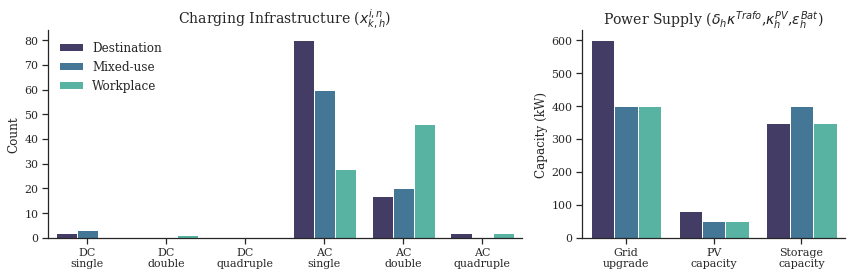

In [20]:
fig,axes=plt.subplots(nrows=1, ncols= 2, figsize=(12,4),sharex=False, gridspec_kw={'width_ratios': [1.8, 1]})
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

ax=axes[0]
data=df_combined[df_combined["item"].isin(["DC\nsingle", "DC\ndouble", "DC\nquadruple","AC\nsingle", "AC\ndouble", "AC\nquadruple"])==True]
sns.barplot(ax=ax,data=data,x="item",y="value",hue="facility_type",palette="mako") #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
#sns.barplot(ax=ax,data=df_combined,x="state",y="total_grid+pv_capa",hue="facility_type",palette=[color_RL,color_OPT]) #labels=["RL-Fast Chargers","OPT-Fast Chargers"]
ax.legend(loc="upper left",frameon=False,fontsize=12)
ax.set_title("Charging Infrastructure ($x^{i,n}_{k,h}$)",fontsize=14)
#ax.set_ylim((0,1000))

ax=axes[1]
data=df_combined[df_combined["item"].isin(["Grid\nupgrade", "PV\ncapacity", "Storage\ncapacity"])==True]
sns.barplot(ax=ax,data=data,x="item",y="value",hue="facility_type",palette="mako") #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
#sns.barplot(ax=ax,data=decision_vars_df,x="state",y="supply_capa",hue="solution",palette=[color_RL2,color_OPT2]) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
#sns.barplot(ax=ax,data=decision_vars_df,x="state",y="storage_capa",hue="solution",palette=[color_RL,color_OPT]) #labels=["RL-Fast Chargers","OPT-Fast Chargers"]
#ax.legend(loc="upper right",frameon=False,fontsize=12)
ax.legend().set_visible(False)
#ax.set_title("Storage Decisions ($\kappa^{Bat}_{s}$)")
ax.set_title("Power Supply ($\delta_h \kappa^{Trafo}$,$\kappa^{PV}_{h}$,$\epsilon^{Bat}_h$)",fontsize=14)

#set lables
#for ax in axes:
#    ax.set_xlabel("State")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("")
#axes[1].set_ylabel("Cumulative Number of Fast Chargers")
axes[1].set_ylabel("Capacity (kW)")
axes[1].set_xlabel("")

sns.despine(ax=axes[0], left=False, bottom=False)
sns.despine(ax=axes[1])

plt.tight_layout()
plt.savefig("../visuals_output/preference_impact_analysis.pdf")
plt.show()